# Create new tasks
This file is used to create new tasks or new scenes.

### New Task: Flip
I add a new predicate "upside_down" to the predicate dictionary, it can be used to check if the object is upside down. With this predicate, we can create a new task "Flip the basket".

Succefully generated: 2
生成的BDDL文件: ['output/bddl_files/LIFT_AND_PLACE_pick_the_butter_and_place_it_in_the_basket.bddl', 'output/bddl_files/LIFT_AND_PLACE_flip_the_basket_upside_down.bddl']
problem_info {'problem_name': 'libero_floor_manipulation', 'domain_name': 'robosuite', 'language_instruction': 'pick the butter and place it in the basket'}
TASK_MAPPING {'libero_tabletop_manipulation': <class 'libero.libero.envs.problems.libero_tabletop_manipulation.Libero_Tabletop_Manipulation'>, 'libero_coffee_table_manipulation': <class 'libero.libero.envs.problems.libero_coffee_table_manipulation.Libero_Coffee_Table_Manipulation'>, 'libero_floor_manipulation': <class 'libero.libero.envs.problems.libero_floor_manipulation.Libero_Floor_Manipulation'>, 'libero_study_tabletop_manipulation': <class 'libero.libero.envs.problems.libero_study_tabletop_manipulation.Libero_Study_Tabletop_Manipulation'>, 'libero_living_room_tabletop_manipulation': <class 'libero.libero.envs.problems.libero_living_room_tabl

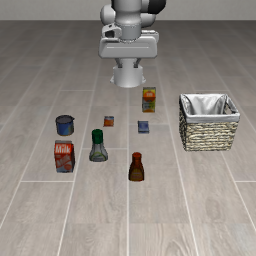

In [2]:
import numpy as np
from libero.libero.utils.bddl_generation_utils import get_xy_region_kwargs_list_from_regions_info
from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates
from libero.libero.utils.task_generation_utils import register_task_info, generate_bddl_from_task_info

@register_mu(scene_type="floor")
class check_basket_upside_down(InitialSceneTemplates):
    def __init__(self):
        # 保持相同的物体配置
        fixture_num_info = {
            "floor": 1,
        }

        object_num_info = {
            "alphabet_soup": 1,
            "basket": 1,
            "salad_dressing": 1,
            "cream_cheese": 1,
            "milk": 1,
            "bbq_sauce": 1,
            "butter": 1,
            "orange_juice": 1,
        }

        super().__init__(
            workspace_name="floor",
            fixture_num_info=fixture_num_info,
            object_num_info=object_num_info
        )

    def define_regions(self):
        # 保持相同的区域定义
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.0, 0.26],
                region_name="bin_region",
                target_name=self.workspace_name,
                region_half_len=0.01
            )
        )

        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[-0.12, -0.24],
                region_name="target_object_region",
                target_name=self.workspace_name,
                region_half_len=0.025
            )
        )

        other_objects_positions = [
            [0.05, -0.1],
            [-0.15, 0.06],
            [0.1, -0.2],
            [0.15, 0.03],
            [-0.2, -0.08],
            [-0.3, 0.09]
        ]

        for i, pos in enumerate(other_objects_positions):
            self.regions.update(
                self.get_region_dict(
                    region_centroid_xy=pos,
                    region_name=f"other_object_region_{i}",
                    target_name=self.workspace_name,
                    region_half_len=0.025
                )
            )

        self.xy_region_kwargs_list = get_xy_region_kwargs_list_from_regions_info(self.regions)

    @property
    def init_states(self):
        # 保持相同的初始状态
        states = [
            ("On", "alphabet_soup_1", "floor_target_object_region"),
            ("On", "salad_dressing_1", "floor_other_object_region_0"),
            ("On", "cream_cheese_1", "floor_other_object_region_1"),
            ("On", "milk_1", "floor_other_object_region_2"),
            ("On", "bbq_sauce_1", "floor_other_object_region_3"),
            ("On", "butter_1", "floor_other_object_region_4"),
            ("On", "orange_juice_1", "floor_other_object_region_5"),
            ("On", "basket_1", "floor_bin_region"),
        ]
        return states

def main():
    # 修改任务信息
    scene_name = "lift_and_place"
    language = "Flip the basket upside down"  # 新的任务描述
    
    register_task_info(
        language,
        scene_name=scene_name,
        objects_of_interest=["basket_1"],  # 只关注篮子
        goal_states=[("UpsideDown", "basket_1")]  # 新的目标状态：检查篮子是否倒扣
    )

    # 生成BDDL文件
    bddl_file_path = "output/bddl_files"
    bddl_file_names, failures = generate_bddl_from_task_info(folder=bddl_file_path)
    
    print("生成的BDDL文件:", bddl_file_names)
    if failures:
        print("生成失败的任务:", failures)

    # 创建环境并显示
    from libero.libero.envs import OffScreenRenderEnv
    from IPython.display import display
    from PIL import Image

    env_args = {
        "bddl_file_name": bddl_file_names[0],
        "camera_heights": 256,
        "camera_widths": 256
    }

    env = OffScreenRenderEnv(**env_args)
    obs = env.reset()
    display(Image.fromarray(obs["agentview_image"][::-1]))

if __name__ == "__main__":
    main()